### 1. Import the necessary libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### 2. Load data


In [2]:
data = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv',parse_dates=['Date'])

### 3. Data analysis and visualization


#### 3.1 Knowing about data


In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.shape

(1000, 17)

In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


#### 3.2 Cleaning data


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [7]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
data.duplicated().sum()

0

#### 3.3 Data analysis


In [9]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
gender = data.Gender.value_counts()
gender

Gender
Female    501
Male      499
Name: count, dtype: int64

In [11]:
type = data['Customer type'].value_counts()
type

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [12]:
branch = data.Branch.value_counts()
branch

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [13]:
pay = data.Payment.value_counts()
pay

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

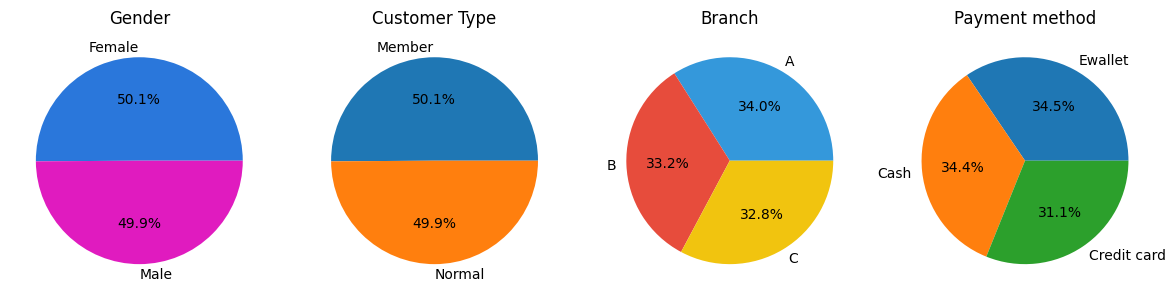

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 6))

ax1.pie(gender, labels=gender.index, colors=['#2a77db','#e01bbf'], autopct='%1.1f%%')
ax1.set_title('Gender')

ax2.pie(type, labels=type.index, autopct='%1.1f%%')
ax2.set_title('Customer Type')

ax3.pie(branch, labels=branch.index, colors=['#3498DB', '#E74C3C', '#F1C40F'], autopct='%1.1f%%')
ax3.set_title('Branch')

ax4.pie(pay, labels=pay.index, autopct='%1.1f%%')
ax4.set_title('Payment method')

plt.tight_layout()
plt.show()

In [15]:
data.groupby('Customer type')['Tax 5%'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer type,,,,,,,,
Member,501.0,15.609110,11.809228,0.5085,5.631,12.668,23.1225,49.65
Normal,499.0,15.148707,11.614419,0.6045,6.154,11.306,22.0290,49.49


As you can see there is some outliers

In [16]:
data.groupby('Branch')['gross income'].sum().to_frame()

,gross income
Branch,
A,5057.1605
B,5057.0320
C,5265.1765


In [17]:
total = data.groupby('Customer type')['Total'].mean()
total

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64

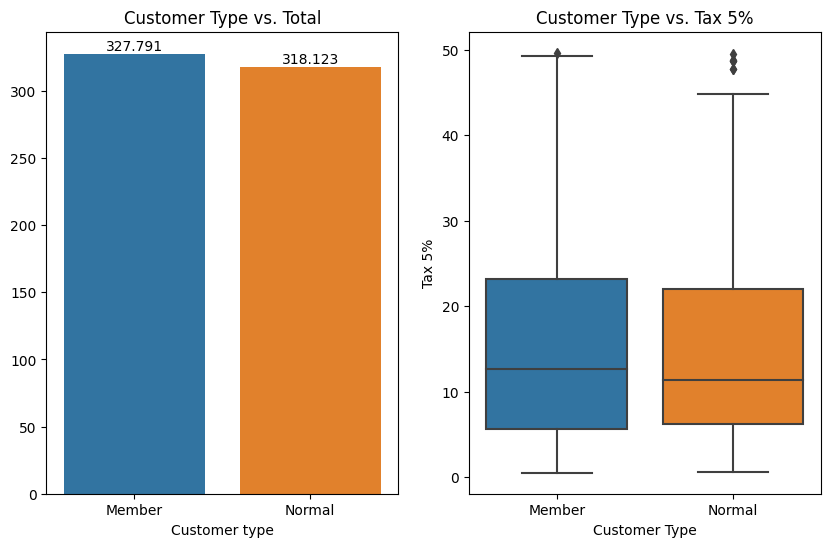

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.barplot(x=total.index, y=total.values, ax=ax1)
ax1.set_title('Customer Type vs. Total')
bars = ax1.containers[0]
ax1.bar_label(bars)

sns.boxplot(x='Customer type', y='Tax 5%', data=data, ax=ax2)
ax2.set_xlabel('Customer Type')
ax2.set_ylabel('Tax 5%')
ax2.set_title('Customer Type vs. Tax 5%')

plt.show()

In [19]:
lines = data['Product line'].value_counts()
lines

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [20]:
grouped = data.groupby('Product line').agg({'gross income': 'sum','Total': 'mean'})
grouped = grouped.rename(columns={'gross income':'Total income','Total':'Avg invoice income'})
grouped

,Total income,Avg invoice income
Product line,,
Electronic accessories,2587.5015,319.632538
Fashion accessories,2585.9950,305.089298
Food and beverages,2673.5640,322.671517
Health and beauty,2342.5590,323.643020
Home and lifestyle,2564.8530,336.636956
Sports and travel,2624.8965,332.065220


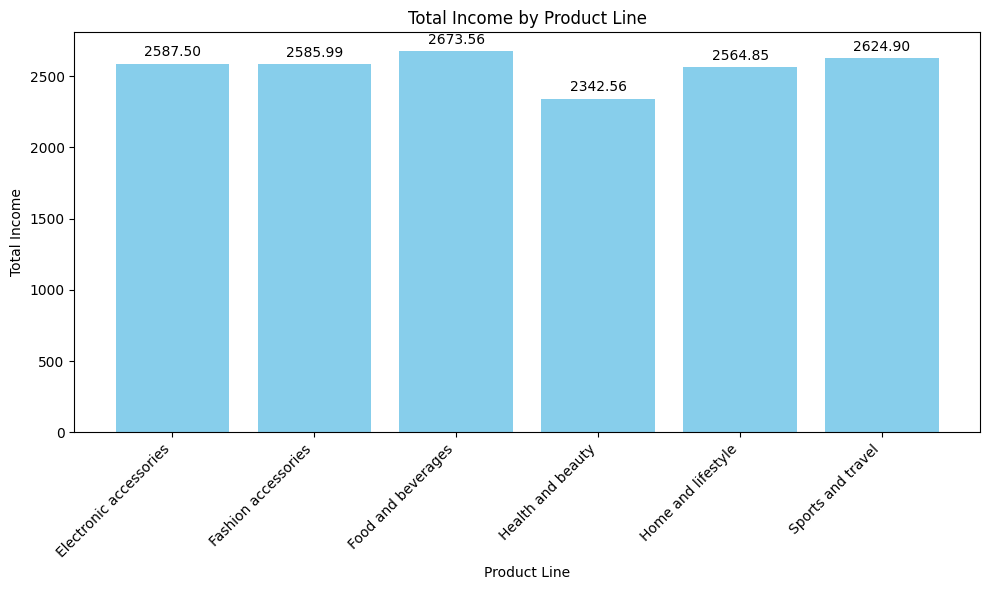

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(grouped.index, grouped['Total income'], color='skyblue', label='Total Income')
ax.set_xlabel('Product Line')
ax.set_ylabel('Total Income')
ax.set_title('Total Income by Product Line')
plt.xticks(rotation=45, ha='right')


for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [22]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### 3.4 Time Series data analysis

In [23]:
data['Month']=data['Date'].dt.month  
data['Day']=data['Date'].dt.day_name()

In [24]:
day_df = data.groupby('Day')['Total'].sum().to_frame()
day_df = day_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
day_df.head(10)

,Total
Day,
Monday,37899.0780
Tuesday,51482.2455
Wednesday,43731.1350
Thursday,45349.2480
Friday,43926.3405
Saturday,56120.8095
Sunday,44457.8925


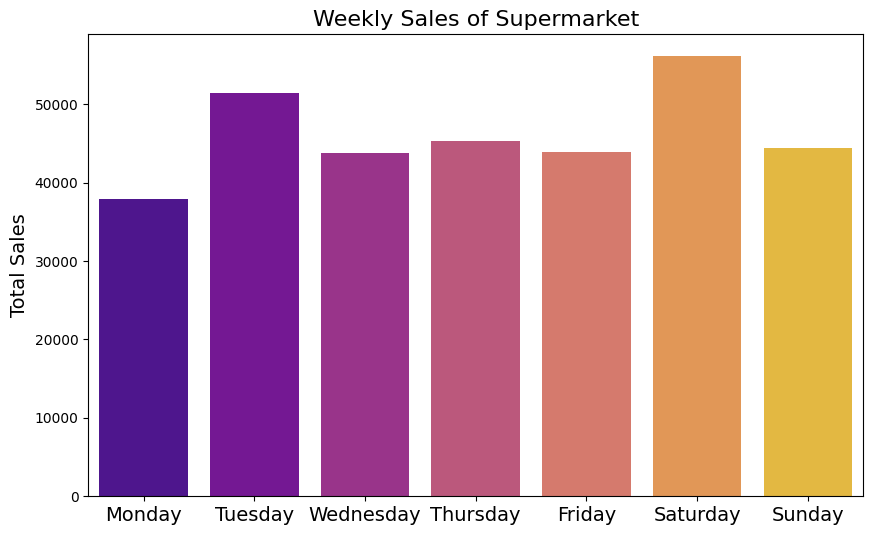

In [25]:
ig, ax1 = plt.subplots(figsize=(10, 6))

daywise_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax1 = sns.barplot(x=daywise_day, y=day_df['Total'], data = day_df, palette='plasma')
ax1.set_title('Weekly Sales of Supermarket', size=16)

ax1.set_ylabel('Total Sales', fontsize=14)
ax1.set_xticklabels(daywise_day, fontsize=14)
plt.show()